# Importing Libraries.

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import random
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Input
from tensorflow.keras.layers import Activation, Concatenate, Conv2D, Multiply
from tensorflow.keras.layers import Lambda

In [2]:
print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


# Prepare data

In [3]:
# Store data into training and testing sets.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Show the first training examples.
print(f"Training Samples: \n{train_data[0]}\n")
print(f"Training labels: \n{train_labels[0]}\n")

Training Samples: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [5]:
# Check the shape of single example.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

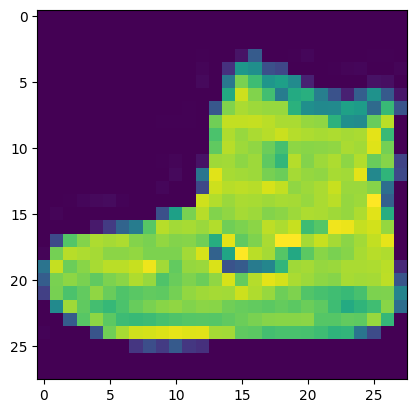

In [6]:
# Plot the single sample.
plt.imshow(train_data[0])

In [7]:
# Check the sample label.
train_labels[0]

9

The sample labels are in numerical form. To make it human readible, we will create a list of class names.

In [8]:
# Create a small list to index the training labels.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

len(class_names)

10

Text(0.5, 1.0, 'Coat')

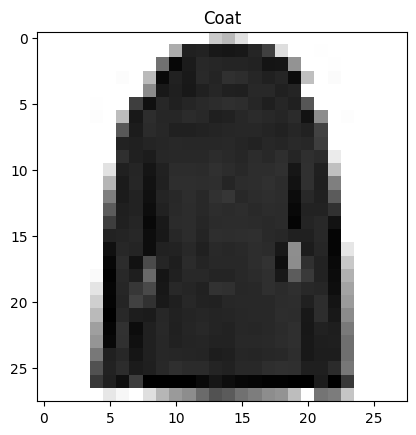

In [9]:
# Plot an example image and it's label.
choice = 2000
plt.imshow(train_data[choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[choice]])

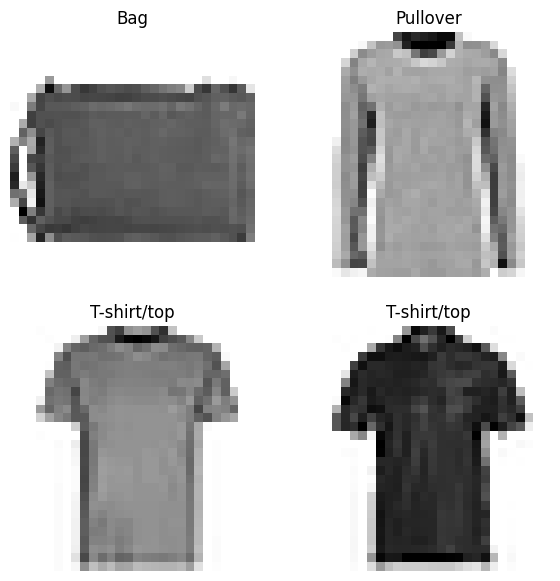

In [10]:
# Plot multiple random images.
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Build and Train.


- `If labels are one_hot encoded`, use  **CategoricalCrossEntropy()**
- `If labels are not one_hot encoded` use **SparseCategoricalCrossEntropy()**

> NN prefer data to be scaled(or normalised). They like to work with number between 0 - 1

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

## Model 1

### Normalising.

In [13]:
# We can normalised the training data by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled training data.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Building and training.

In [14]:
# Set random seed.
tf.random.set_seed(42)

# Creating the model.
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model.
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model.
history1 = model1.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4389 - loss: 1.4803 - val_accuracy: 0.6700 - val_loss: 0.8502
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7032 - loss: 0.7959 - val_accuracy: 0.7326 - val_loss: 0.7161
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7385 - loss: 0.7002 - val_accuracy: 0.7421 - val_loss: 0.6792
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7511 - loss: 0.6657 - val_accuracy: 0.7502 - val_loss: 0.6602
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7599 - loss: 0.6446 - val_accuracy: 0.7606 - val_loss: 0.6468
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7687 - loss: 0.6299 - val_accuracy: 0.7666 - val_loss: 0.6376
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7738 - loss: 0.6192 - val_accuracy: 0.7689 - val_loss: 0.6322
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7772 - loss: 0.6103 

## Model 2(with CBAM)

### USING CAM

In [15]:
def ChannelAttentionModule(input_feature, ratio=8):
    channels = input_feature.shape[-1]  # Extract number of channels

    ## Shared MLP
    shared_layer1 = Dense(channels // ratio, activation='relu', use_bias=False)
    shared_layer2 = Dense(channels, use_bias=False)

    ## Average Pooling.
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = shared_layer1(avg_pool)
    avg_pool = shared_layer2(avg_pool)

    ## Max Pooling
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = shared_layer1(max_pool)
    max_pool = shared_layer2(max_pool)

    # Add Avg and Max pools and apply sigmoid.
    features = avg_pool + max_pool
    features = Activation("sigmoid")(features)
    # Reshape features to match input_feature dimensions.
    features = Reshape((1, 1, channels))(features)

    ## Multiply with the input image features.
    refined_features = Multiply()([input_feature, features])

    return refined_features

### USING SAM

In [16]:
def SpatialAttentionModule(input_feature):
    ## Average Pooling.
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_feature)

    ## Max Pooling
    max_pool = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_feature)
    ## Concatenate
    features = Concatenate(axis=-1)([avg_pool, max_pool])

    ## Convulational Layer.
    features = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(features)
    features = Multiply()([input_feature, features])

    return features

### CBAM BLOCK

In [17]:
def CBAM(input_feature):
    input_feature = ChannelAttentionModule(input_feature, ratio=8)
    input_feature = SpatialAttentionModule(input_feature)
    return input_feature

### Model 2 with CBAM.
> Place CBAM after Conv layers or, before fully connected layers.

In [18]:
input_layer = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3,3), activation="relu")(input_layer)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = CBAM(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model2 = tf.keras.Model(inputs=input_layer, outputs=output)

# Compile the model.
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model.
history2 = model2.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4304 - loss: 1.5486 - val_accuracy: 0.7152 - val_loss: 0.7981
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7283 - loss: 0.7477 - val_accuracy: 0.7467 - val_loss: 0.6611
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7672 - loss: 0.6139 - val_accuracy: 0.8135 - val_loss: 0.5445
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8232 - loss: 0.5085 - val_accuracy: 0.8501 - val_loss: 0.4633
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8548 - loss: 0.4329 - val_accuracy: 0.8644 - val_loss: 0.4193
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8710 - loss: 0.3853 - val_accuracy: 0.8703 - val_loss: 0.3938
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8790 - loss: 0.3560 - val_accuracy: 0.8775 - val_loss: 0.3797
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8872 - loss: 0.33

# Comparing the loss curves of each model.

<Axes: title={'center': 'Normalised Data and CBAM integrated'}>

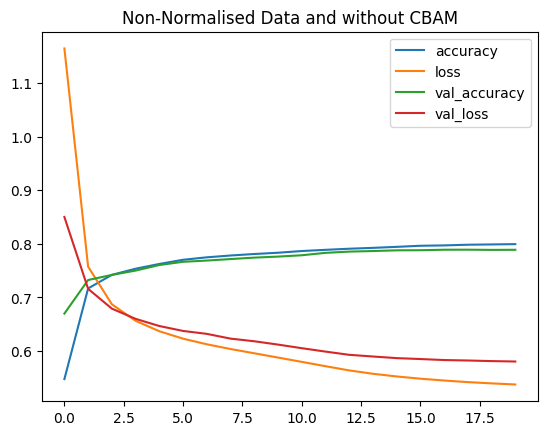

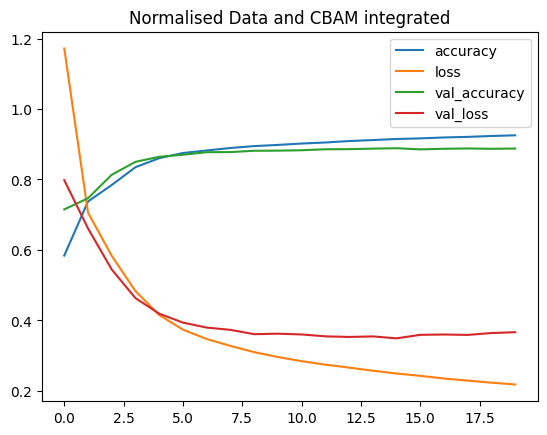

In [20]:
# Plot the non-normalised data.
pd.DataFrame(history1.history).plot(title="Non-Normalised Data and without CBAM")

# Plot the normalised data.
pd.DataFrame(history2.history).plot(title="Normalised Data and CBAM integrated")

> When comparing the results:
The same model with even slightly different data can produce dramatically different results.

# Evaluating the classification model.
To evaluate our multi-class classification model:
1. Evaluate it's performance using other classification metrics(recall, precision, F1-Score, Confusion matrix)
2. Asses some of it's predictions(through visualizations).
3. Improve it's results (by training it for longer or changing the architecture of the model).
4. Save and export it for use in an application.

## Evaluating by confusion matrix.

Making customized function.

In [21]:
# Creating confusion matrix.

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix.
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix.
  n_classes = cm.shape[0]

  # Let's pretify it.
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes.
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes.
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size.
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=text_size)

In [22]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel Boot']

In [23]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
# Making some predictions with our model.
y_probs = model2.predict(test_data_norm)

# View prediction probs 5.
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.2451841e-18, 5.7032675e-24, 3.4111328e-29, 1.5829000e-06,
        6.6918292e-15, 5.9395761e-06, 5.3684565e-27, 2.5480716e-03,
        6.0860515e-17, 9.9744439e-01],
       [1.4309837e-03, 1.5517751e-06, 9.6968347e-01, 3.2183132e-04,
        5.8838758e-03, 1.2757981e-06, 1.5871875e-02, 4.3847875e-05,
        6.7529324e-03, 8.1784538e-06],
       [1.5780948e-11, 9.9998224e-01, 2.5174091e-23, 1.8294997e-09,
        7.4050800e-11, 2.8025969e-44, 1.7739259e-05, 1.0634883e-24,
        0.0000000e+00, 1.7016182e-22],
       [1.5877655e-14, 9.9999928e-01, 5.7250698e-27, 8.4682822e-10,
        1.6373617e-09, 0.0000000e+00, 6.6697254e-07, 3.4952545e-24,
        0.0000000e+00, 1.8266876e-22],
       [8.4229849e-02, 7.2377129e-04, 4.4858456e-03, 9.7187031e-03,
        3.6637485e-03, 1.1382824e-13, 8.9717686e-01, 3.2431763e-07,
        1.6087982e-12, 1.0052494e-06]], dtype=float32)

> **Note**: Make predictions on the same kind of data. If the model is trained on normalised data, then make predictions on normalised data.

In [25]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.2451841e-18, 5.7032675e-24, 3.4111328e-29, 1.5829000e-06,
        6.6918292e-15, 5.9395761e-06, 5.3684565e-27, 2.5480716e-03,
        6.0860515e-17, 9.9744439e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankel Boot')

In [26]:
# Convert all of the prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 2, 1, 1, 6])

In [27]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[786,   0,  29,  58,   6,   0, 114,   2,   4,   1],
       [  0, 963,   0,  18,   6,   0,  12,   0,   1,   0],
       [ 11,   1, 865,  12,  60,   0,  47,   0,   4,   0],
       [  8,   1,   5, 924,  29,   0,  16,   1,  16,   0],
       [  0,   0,  51,  28, 876,   0,  39,   0,   6,   0],
       [  0,   0,   0,   0,   0, 957,   0,  22,   4,  17],
       [110,   1, 102,  57, 119,   0, 604,   0,   7,   0],
       [  0,   0,   0,   0,   1,   6,   0, 981,   0,  12],
       [  1,   0,  10,   0,   4,   6,   1,   2, 975,   1],
       [  0,   0,   0,   1,   0,   9,   0,  42,   0, 948]])

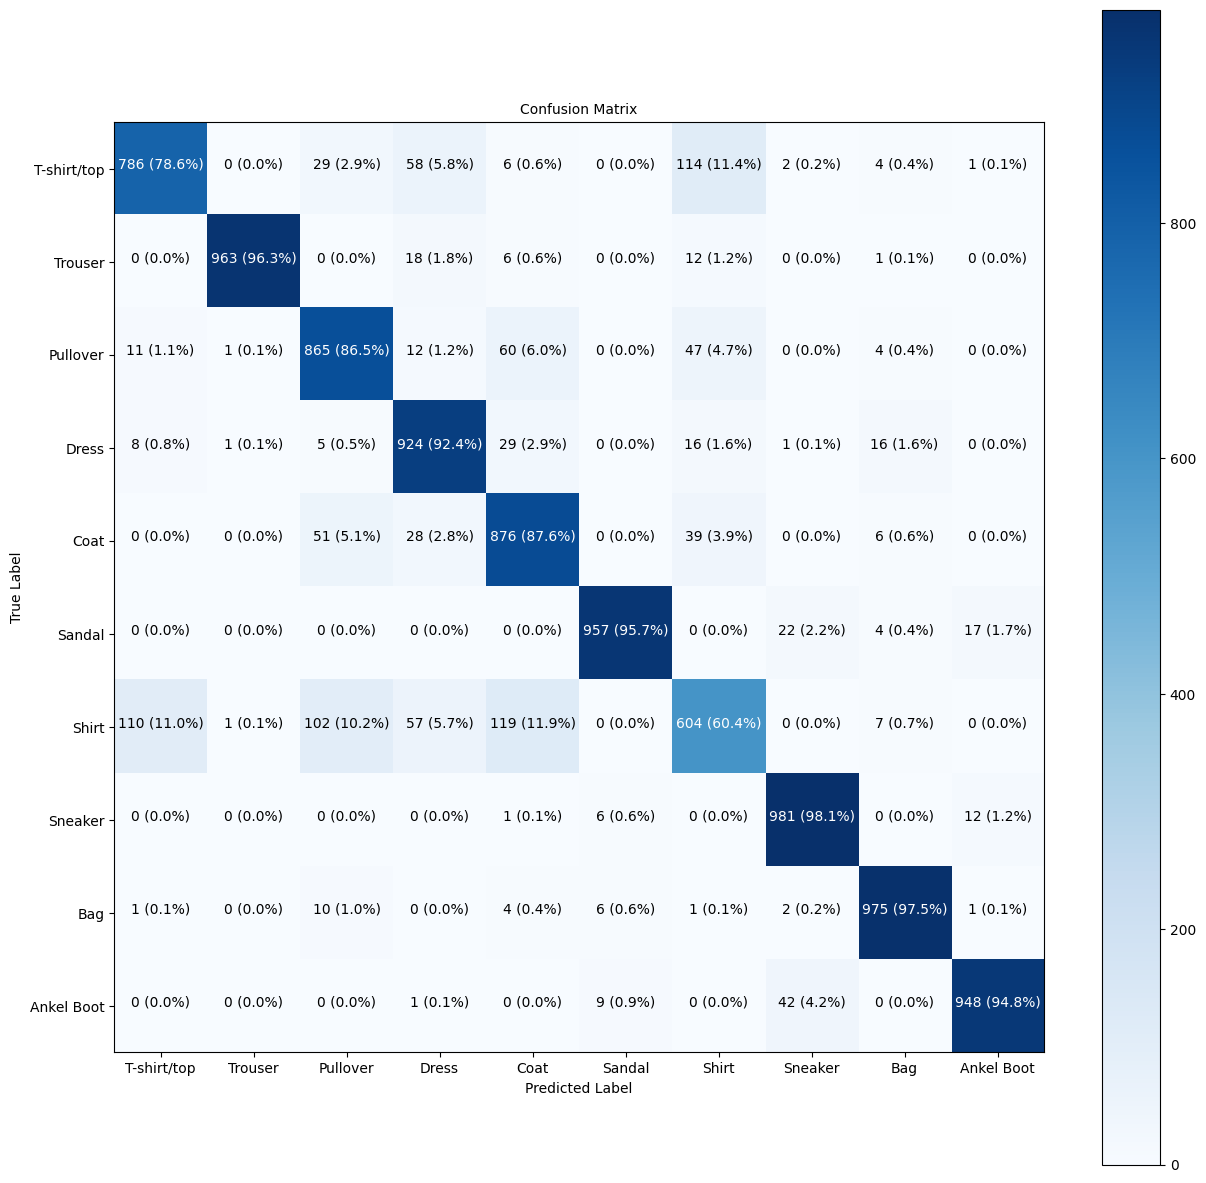

In [28]:
# View a pretier confusion matrix.
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

## Evaluating model with visualization.
* Plot a random image.
* Make prediction on said image.
* Label the plot with the truth label and the predicted label.

In [29]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with the true and predicted labels.
  """

  # Set up random integer.
  i = random.randint(0, len(images))

  # Create predictions and targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image.
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


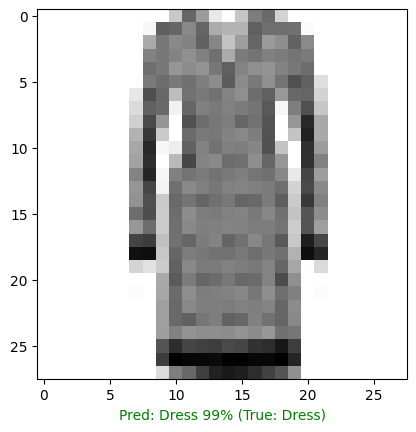

In [31]:
# Check out a random image as well as its prediction.
plot_random_image(model=model2, images=test_data_norm, true_labels=test_labels, classes=class_names)

# What Patterns our model is learning.

In [32]:
# Find the layers of our most recent model.
model2.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>,
 <GlobalMaxPooling2D name=global_max_pooling2d, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Activation name=activation, built=True>,
 <Reshape name=reshape, built=True>,
 <Multiply name=multiply, built=True>,
 <Lambda name=lambda, built=True>,
 <Lambda name=lambda_1, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <Multiply name=multiply_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

In [33]:
# Extract a particular layer.
model2.layers[1]

<Conv2D name=conv2d, built=True>

In [34]:
# Get the patterns of a layer in our network.
weights, biases = model2.layers[1].get_weights()

# Shapes,
weights, weights.shape

(array([[[[-3.62343937e-01,  3.06867629e-01, -7.40961283e-02,
           -1.22032188e-01, -5.49733698e-01,  1.44025192e-01,
            5.99049330e-01,  1.07499706e-02, -9.32739437e-01,
            4.48069602e-01, -2.75993526e-01, -8.01138639e-01,
           -1.52329924e-02, -2.04033956e-01,  8.72010514e-02,
            5.18219888e-01,  2.53133953e-01,  5.86566031e-01,
            2.68382933e-02, -8.28894451e-02, -2.69308358e-01,
            1.18424436e-02, -2.32519650e+00,  2.46341303e-02,
           -5.73741853e-01,  3.50871652e-01, -1.18235499e-01,
            7.26354197e-02, -3.25604767e-01,  2.54887044e-01,
           -2.33382559e+00, -1.62068680e-01]],
 
         [[-3.80573750e-01,  1.07952394e-01,  3.79743695e-01,
            4.11605418e-01, -5.95550597e-01, -5.74790478e-01,
            7.77520910e-02, -4.70386073e-02,  6.02104604e-01,
           -5.67742288e-01,  6.99773431e-02,  4.25854415e-01,
            2.43548796e-01,  5.21764696e-01, -1.09301895e-01,
            3.4617120

Each data points in our input tensors(784) our weight matrix have 4 numbers that it starts to learn and adjust to find patterns in 784 number.

Every neuron has a bias vector. Each of these are paired with a weigths vecotr.
The biased vector is initialized as zeros(In case for TensorFlow Dense Layer)

In [36]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 32)     │            320 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 13, 13, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 32)             │              0 │ max_pooling2d[0][0]    │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 32)             │              0 │ max_pooling2d[0][0]    │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │            128 │ global_average_poolin… │
│                           │                        │                │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │            128 │ dense_3[0][0],         │
│                           │                        │                │ dense_3[1][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32)             │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_4[1][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32)             │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 1, 32)       │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 13, 13, 32)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 13, 13, 1)      │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 13, 13, 1)      │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 13, 13, 2)      │              0 │ lambda[0][0],          │
│                           │                        │                │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 13, 13, 1)      │             99 │ concatenate[0][0]      │
├──────────────────────

 Total params: 76,937 (300.54 KB)

 Trainable params: 25,645 (100.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,292 (200.36 KB)

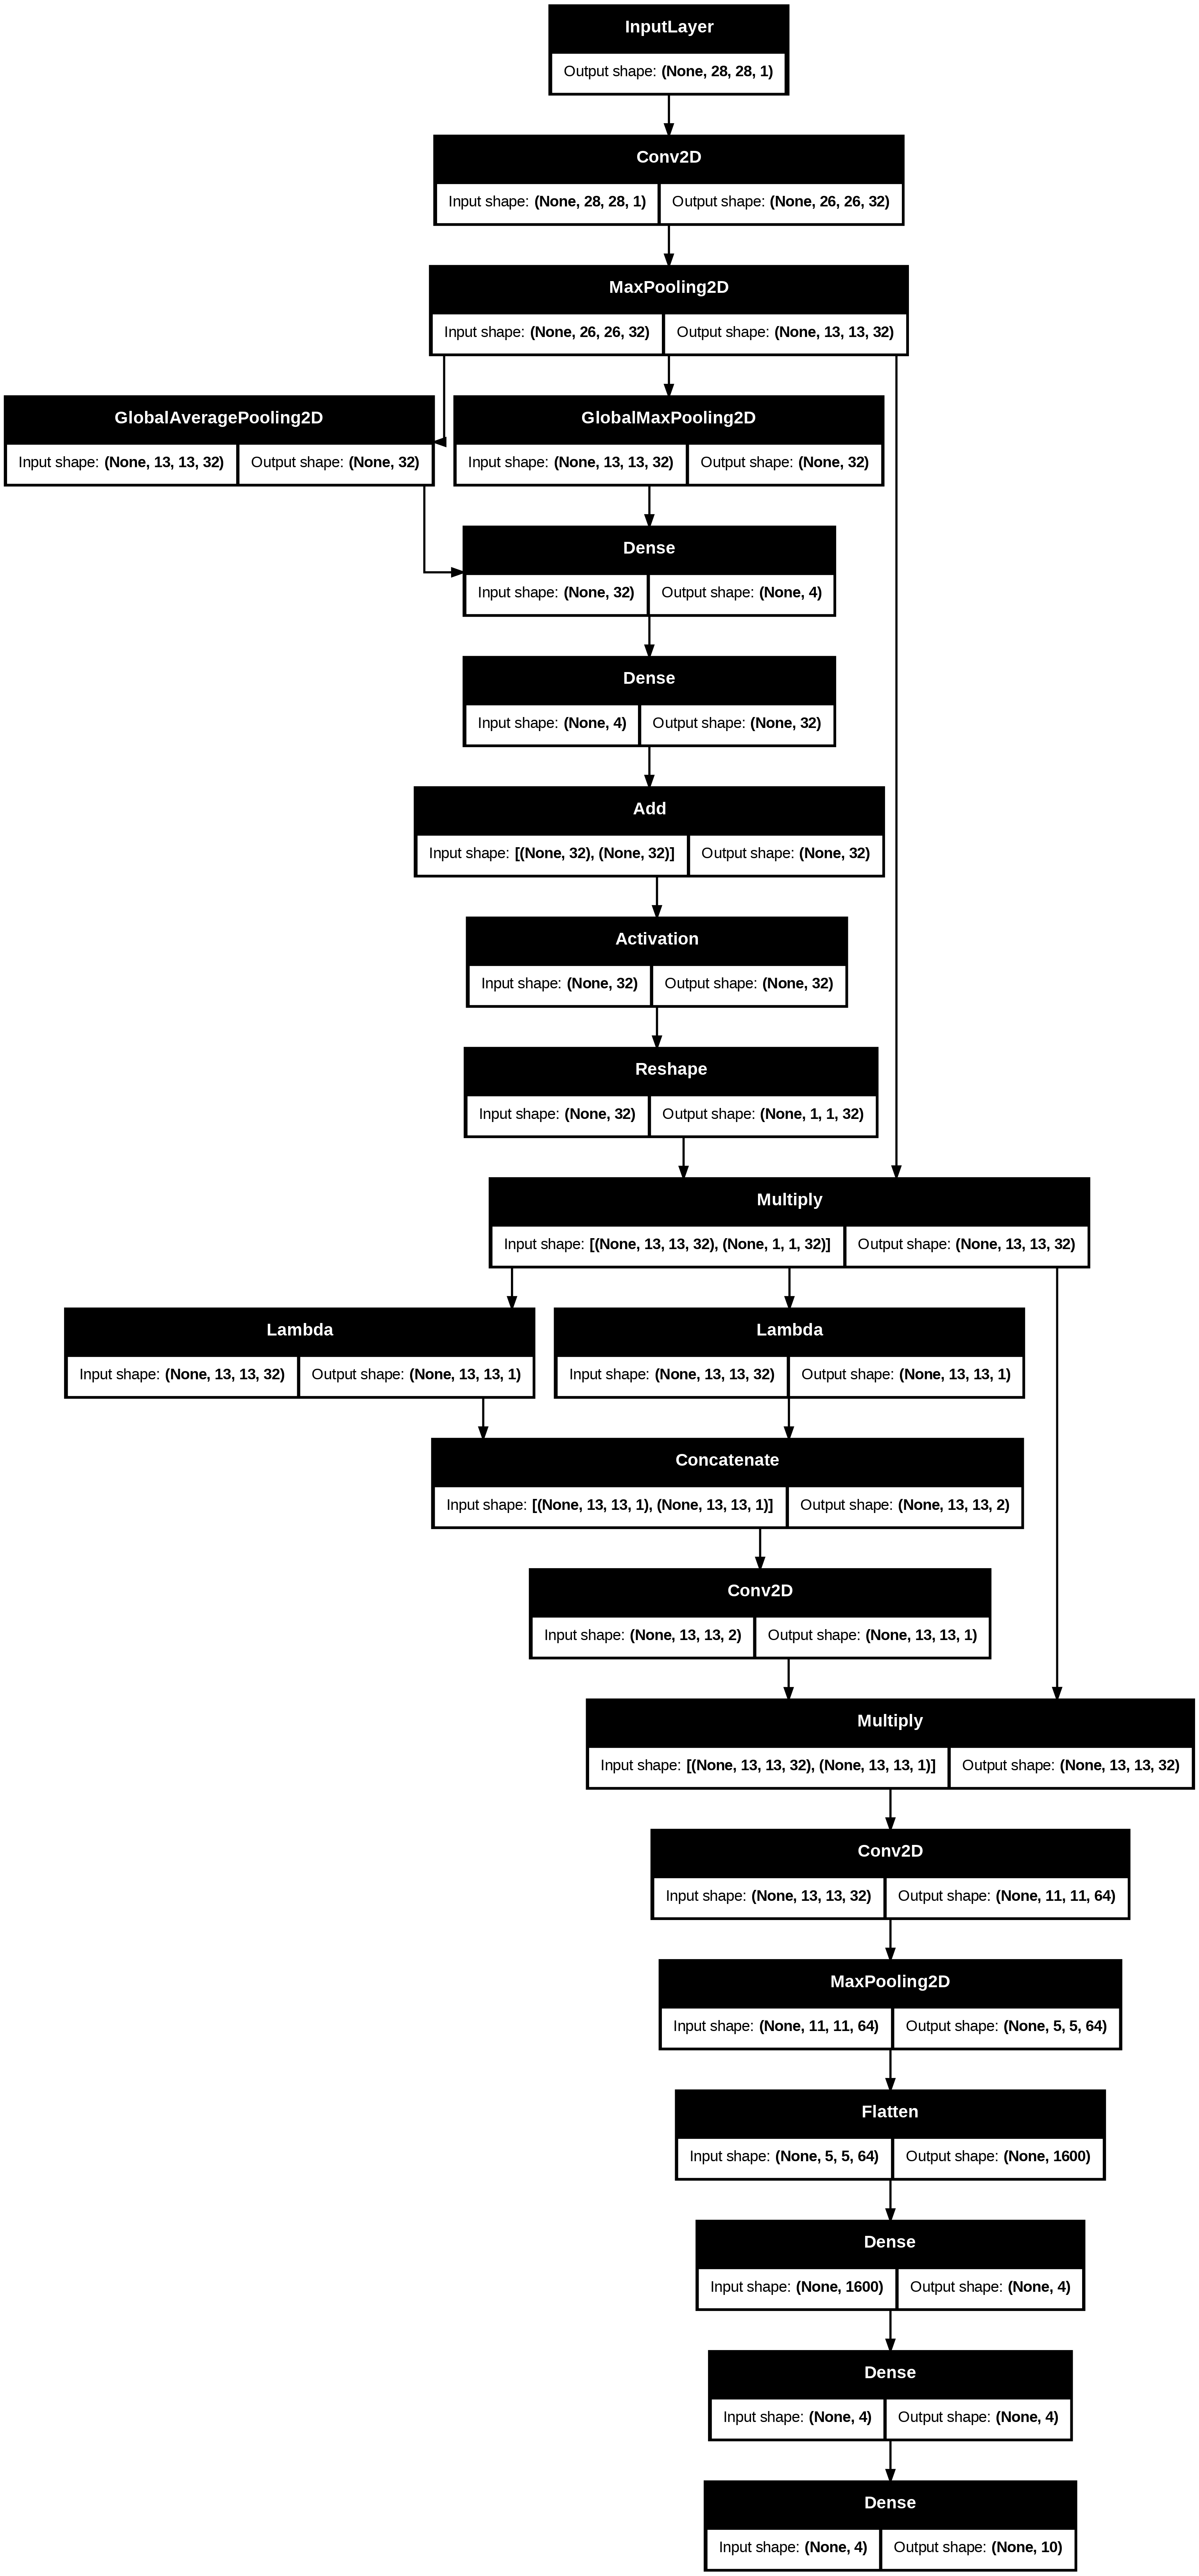

In [38]:
# Plot the inputs and outputs of each layer.
plot_model(model2, show_shapes=True)